# Imports

In [39]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [40]:
n = 5 # 5 increase n 
label_name = "stat7"
layers = [5] #[7, 2]

epochs = 2000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [41]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [42]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 3.310383677482605
Epoch 1, Loss 3.316454529762268
Epoch 2, Loss 3.3362263441085815
Epoch 3, Loss 3.283389925956726
Epoch 4, Loss 3.210829973220825
Epoch 5, Loss 3.257555842399597
Epoch 6, Loss 3.2581536769866943
Epoch 7, Loss 3.282325029373169
Epoch 8, Loss 3.240259289741516
Epoch 9, Loss 3.160314917564392
Epoch 10, Loss 3.2192026376724243
Epoch 11, Loss 3.186193346977234
Epoch 12, Loss 3.2040770053863525
Epoch 13, Loss 3.196642756462097
Epoch 14, Loss 3.1021225452423096
Epoch 15, Loss 3.260873317718506
Epoch 16, Loss 3.0941131114959717
Epoch 17, Loss 3.2063894271850586
Epoch 18, Loss 3.2054611444473267
Epoch 19, Loss 3.1516010761260986
Epoch 20, Loss 3.129305601119995
Epoch 21, Loss 3.1482441425323486
Epoch 22, Loss 3.0327303409576416
Epoch 23, Loss 3.1097060441970825
Epoch 24, Loss 3.121234893798828
Epoch 25, Loss 3.126524329185486
Epoch 26, Loss 3.0650510787963867
Epoch 27, Loss 3.0615392923355103
Epoch 28, Loss 2.976594567298889
Epoch 29, Loss 2.9505417346954346
Epoch

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

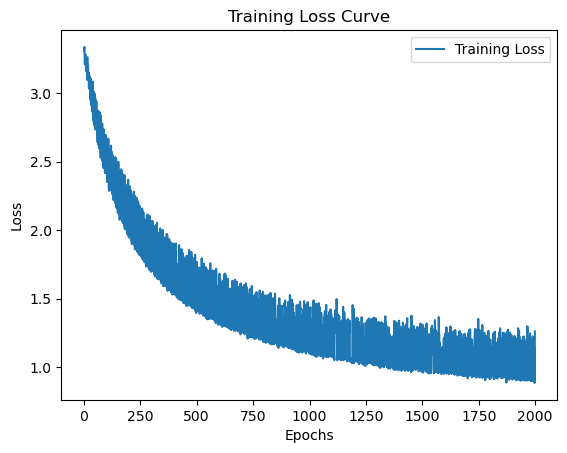

In [43]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[1, 0, 0, 0, 0], [0, 15, 5, 0, 0], [2, 8, 27, 14, 1], [0, 1, 5, 16, 0], [0, 0, 0, 0, 1]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 75.0%
Accuracy for class 2 = 51.92307692307692%
Accuracy for class 3 = 72.72727272727273%
Accuracy for class 4 = 100.0%
Overall accuracy = 62.5%


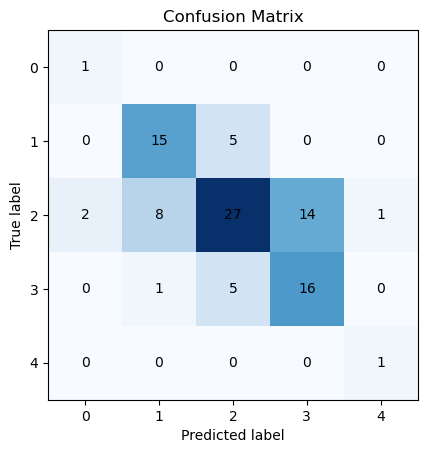

In [44]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

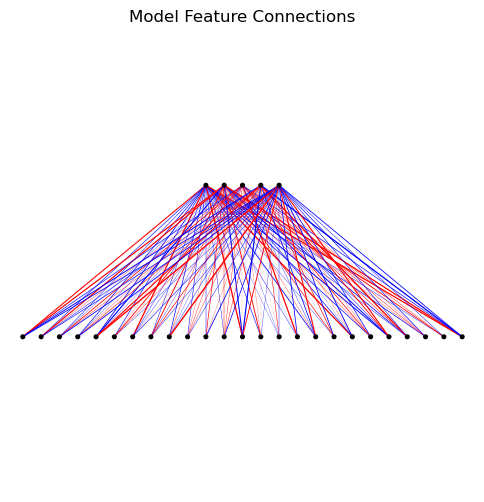

In [45]:
model.plot_connections()

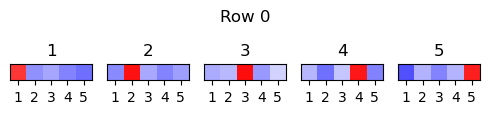

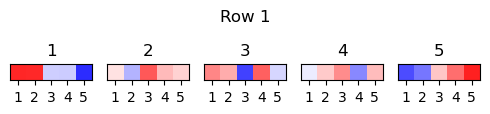

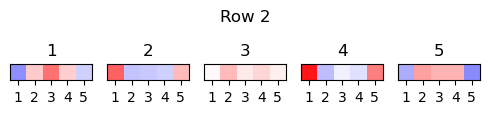

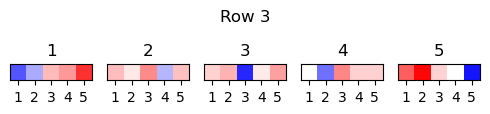

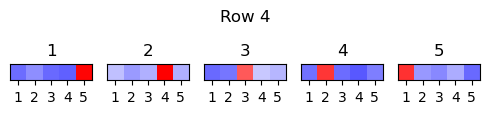

In [46]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)
model.plot_heatmap_feature(0,2)
model.plot_heatmap_feature(0,3)
model.plot_heatmap_feature(0,4)

In [47]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [48]:
import pandas as pd
from ast import literal_eval

# Load the dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
data = pd.read_csv(file_path)

# Function to count positions where a number is greater than the next number
def count_descending_pairs(permutation):
    descending_pairs = sum(1 for i in range(len(permutation) - 1) if permutation[i] > permutation[i + 1])
    return descending_pairs

# Convert permutation column from string to tuple
data['permutation'] = data['permutation'].apply(literal_eval)

# Define the rule that stat7 is equal to the number of descending pairs
def descending_pairs_rule(permutation):
    return count_descending_pairs(permutation)

# Apply the rule to the dataset
data['predicted_stat7'] = data['permutation'].apply(descending_pairs_rule)

# Check the accuracy of this rule
accuracy_descending_pairs_rule = (data['predicted_stat7'] == data['stat7']).mean()

# Output the accuracy
print(f'Accuracy of the rule that stat7 is equal to the number of descending pairs: {accuracy_descending_pairs_rule}')

Accuracy of the rule that stat7 is equal to the number of descending pairs: 1.0
